In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\admin\\Desktop\\diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
#any values

#not necessary in above information we can see

df.isnull().values.any()

False

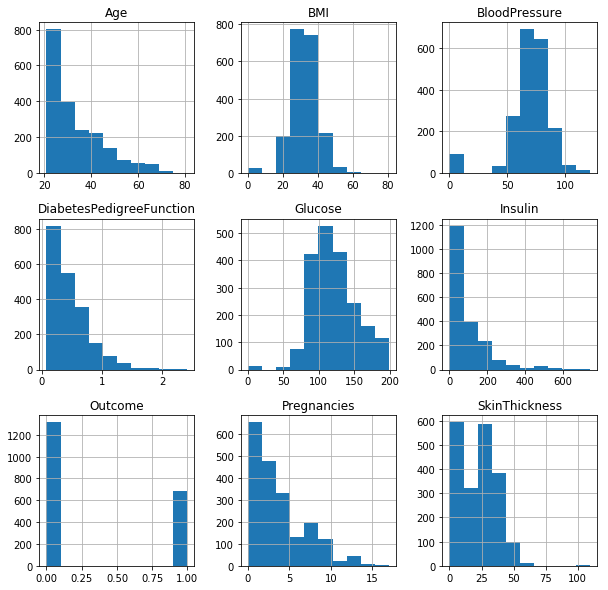

In [5]:
#histogram

df.hist(bins=10,figsize=(10,10))

plt.show()

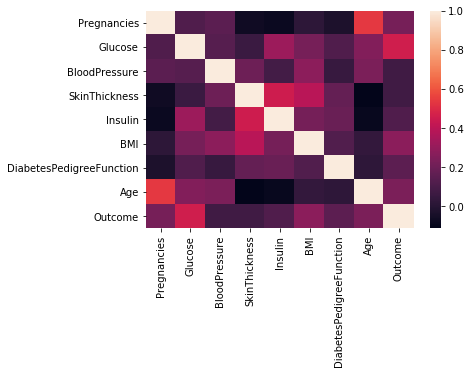

In [6]:
#corelation

sns.heatmap(df.corr())

# we can see skin thickness, insulin ,pregnencies and age are full independent to each other

#age and pregnencies has -ve corelation

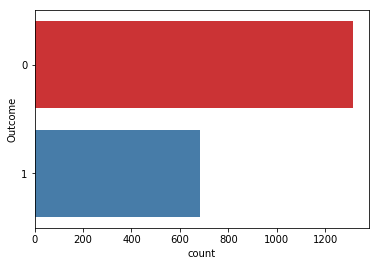

In [7]:
#lets count total outcome in each target 0 1

#0 means not diabeted

#1 means patient with diabetis

sns.countplot(y=df['Outcome'],palette='Set1')

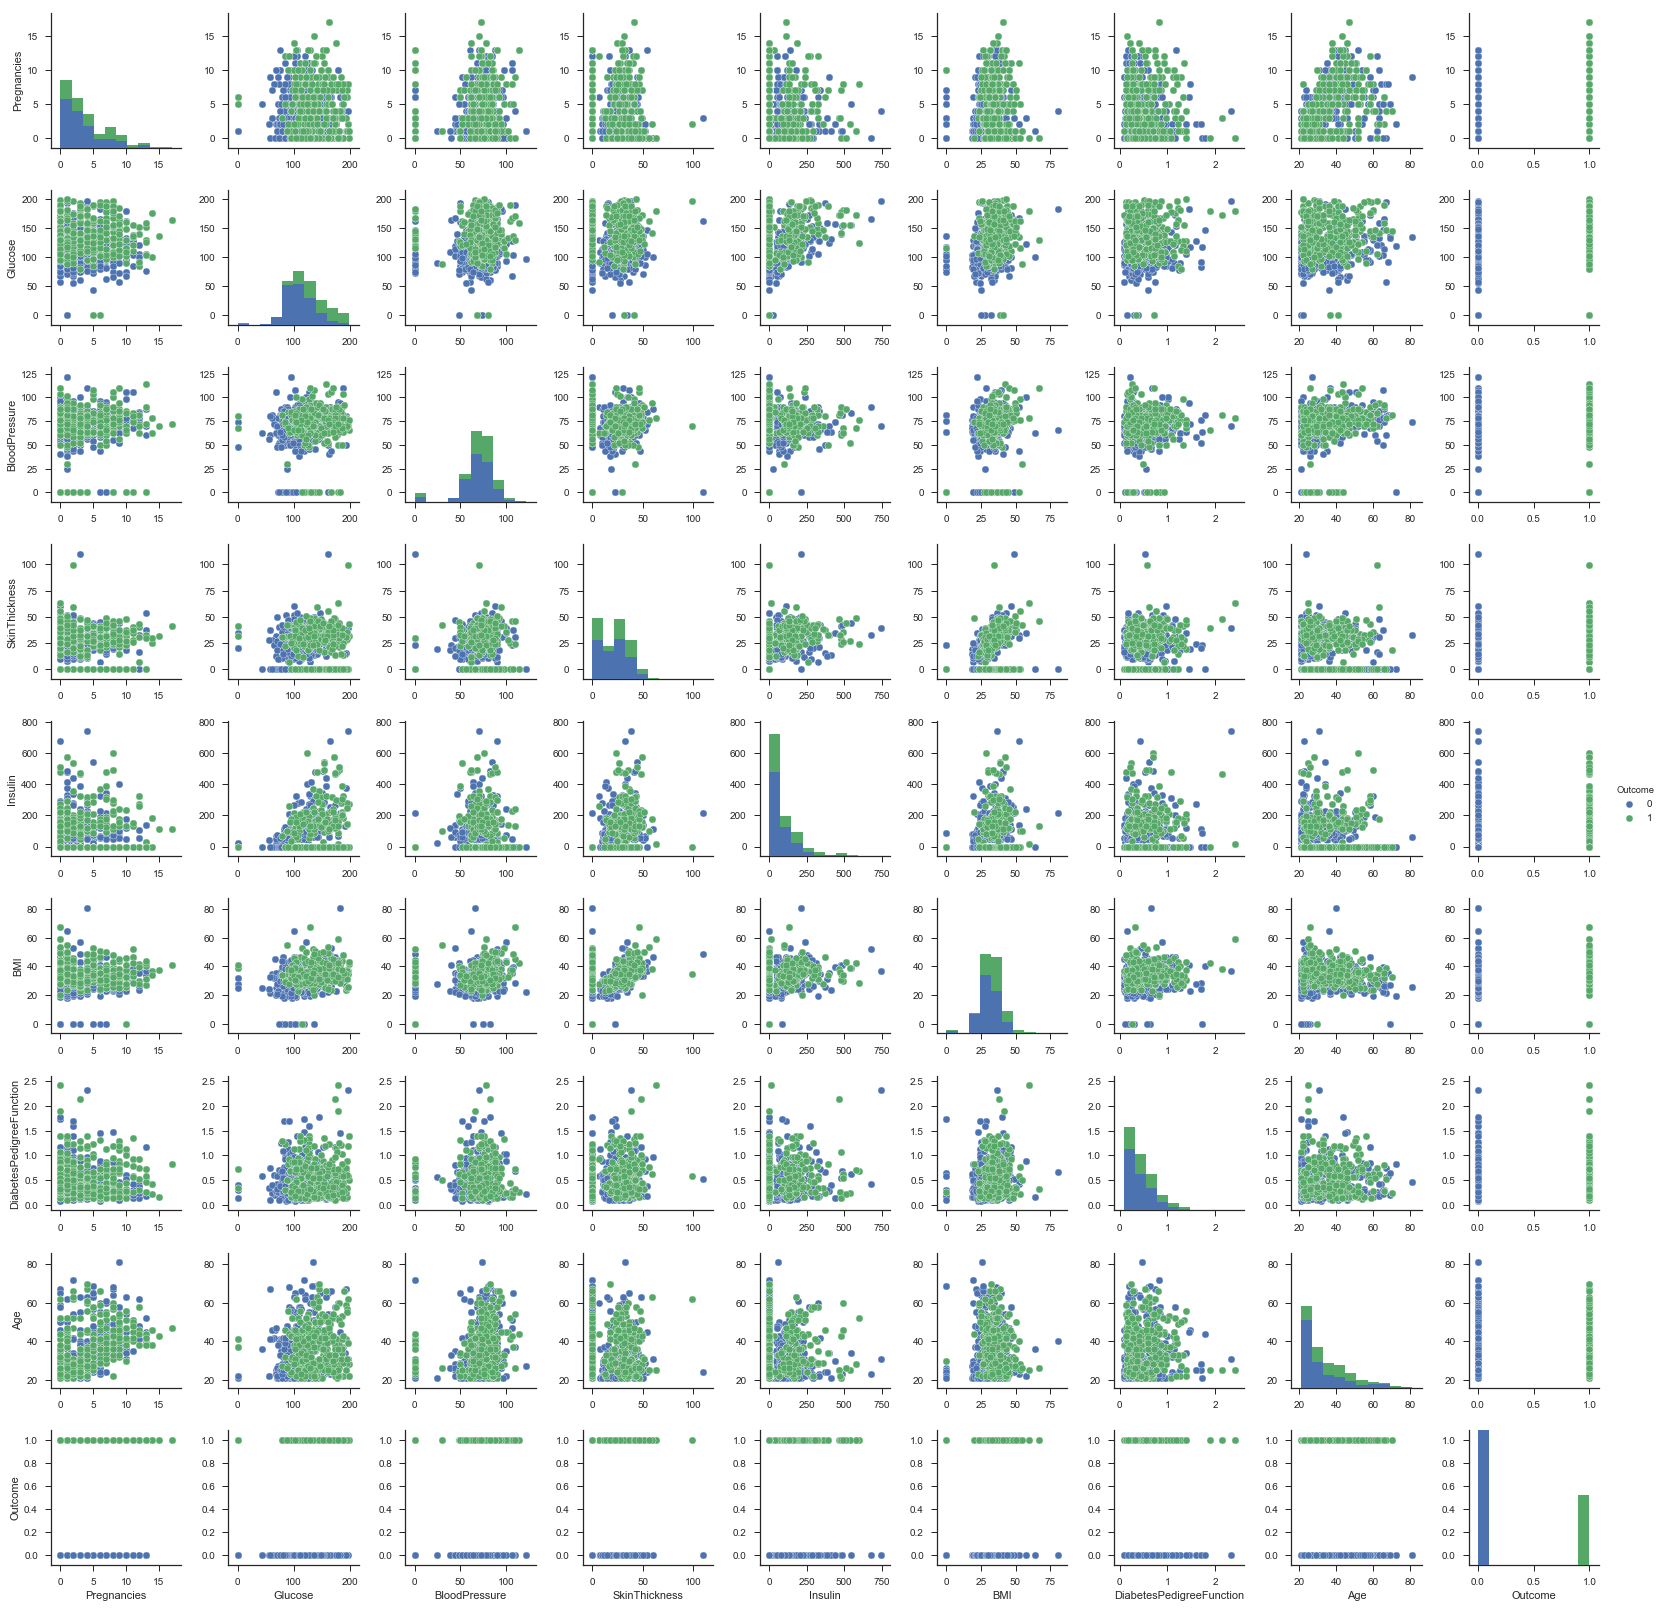

In [8]:
sns.set(style="ticks")

sns.pairplot(df,hue="Outcome")

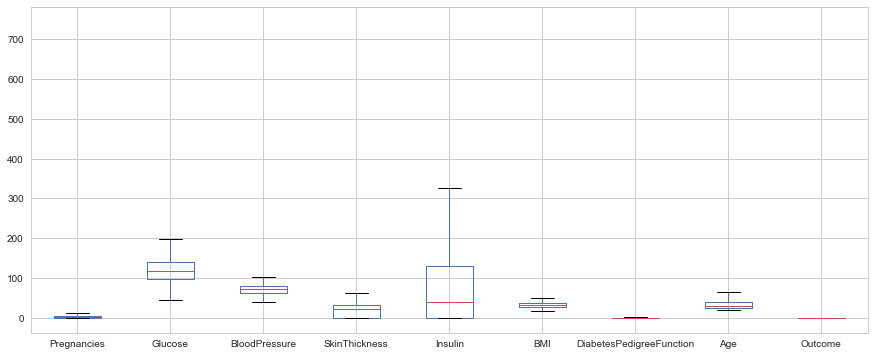

In [9]:
#boxplot for outlier visualization

sns.set(style="whitegrid")

df.boxplot(figsize=(15,6))

In [10]:
Q1=df.quantile(0.25)

Q3=df.quantile(0.75)

IQR=Q3-Q1

print("---Q1---\n",Q1)

print("---Q3---\n",Q3)

print("---IQR---\n",IQR)

#print(df<(Q1 - 1.5*IQR))|(df> (Q3 + 1.5 * IQR)))

---Q1---
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64
---Q3---
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64
---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                     

In [11]:
df_out=df[~((df<(Q1 - 1.5 *IQR))|(df>(Q3 + 1.5 * IQR))).any(axis=1)]

df.shape,df_out.shape

((2000, 9), (1652, 9))

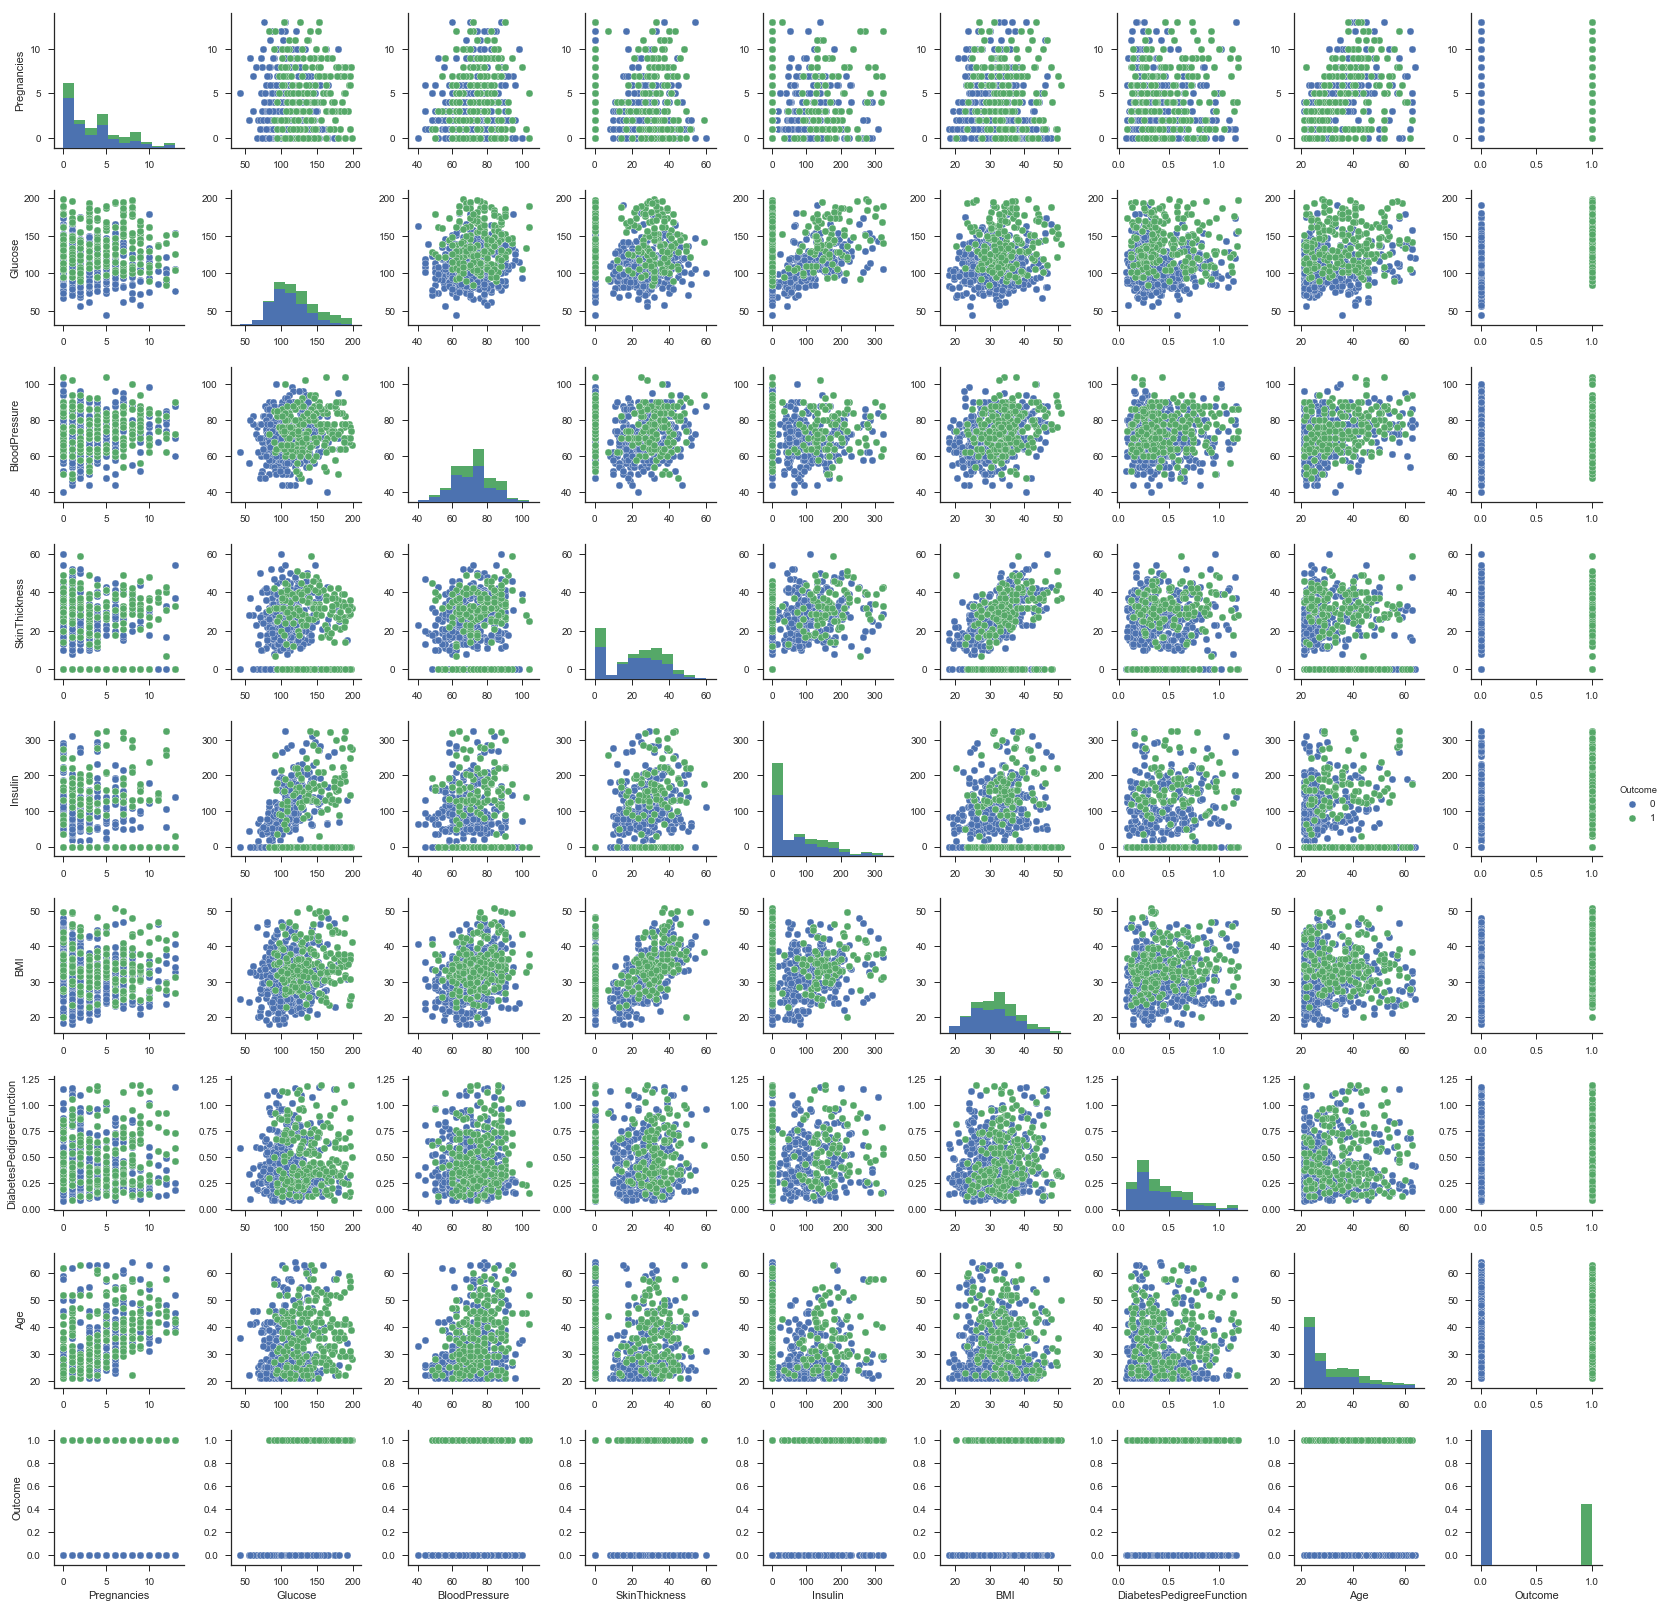

In [12]:
sns.set(style="ticks")

sns.pairplot(df_out, hue="Outcome")

plt.show( )

In [13]:
X=df_out.drop('Outcome',axis=1)

y=df_out['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [15]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer



from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0,0]

def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0,1]

def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1,0]

def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1,1]

scoring = {'accuracy': make_scorer(accuracy_score),'prec':'precision'}

scoring = {'tp': make_scorer(tp),'tn':make_scorer(tn),'fp': make_scorer(fp),'fn':make_scorer(fn)}

def display_result(result):

  print("TP:" ,result['test_tp'])

  print("TN:" ,result['test_tn'])

  print("FN:" ,result['test_fn'])

  print("FP:" ,result['test_fp'])

In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
acc=[]
roc=[]
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)
#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))
#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9063444108761329 ROC 0.8774267399267399
TP: [30 31 29 33 32 35 30 32 33 28]
TN: [84 79 77 81 81 83 79 76 81 79]
FN: [13 12 14 10 11  7 12 10  9 14]
FP: [ 6 11 13  9  9  7 10 13  8 10]


In [25]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)
#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))
#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8912386706948641 ROC 0.8567765567765567
TP: [32 31 28 31 31 36 31 32 33 30]
TN: [88 84 85 81 83 83 87 79 87 88]
FN: [11 12 15 12 12  6 11 10  9 12]
FP: [ 2  6  5  9  7  7  2 10  2  1]


In [24]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)
#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))
#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9577039274924471 ROC 0.9503663003663003
TP: [37 42 38 38 36 42 37 41 36 35]
TN: [90 87 86 87 90 87 89 85 89 87]
FN: [6 1 5 5 7 0 5 1 6 7]
FP: [0 3 4 3 0 3 0 4 0 2]


In [23]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)
#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))
#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9697885196374623 ROC 0.9723443223443224
TP: [39 43 40 39 40 42 39 41 42 36]
TN: [90 81 86 84 83 84 89 84 88 87]
FN: [4 0 3 4 3 0 3 1 0 6]
FP: [0 9 4 6 7 6 0 5 1 2]
